## GeneCheck: Cancer Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


### Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

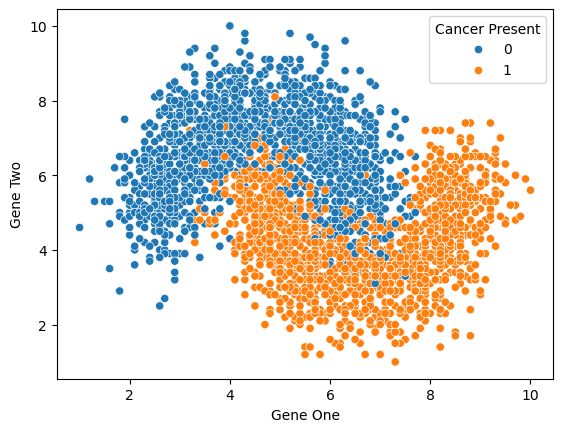

In [5]:
sns.scatterplot(x=df['Gene One'],y=df['Gene Two'],hue=df['Cancer Present'])
plt.show()

In [6]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

**Seperating Predictor Variable & Response Vector**

In [7]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

**train-test-split**

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=9)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Modelling & Hyperparameter Tuning

In [10]:
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,100))}

from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
model.fit(X_train,y_train)
model.best_params_

# model_2=model.best_estimator_        #model.best_estimator_ holds the model that had the best performance so we don't need to train with training data again

{'n_neighbors': 19}

### KNN model with best Parameters

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=19)
model.fit(X_train,y_train)
ypred_train=model.predict(X_train)
ypred_test=model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print(f"Train accuracy is {accuracy_score(y_train,ypred_train)}")
print(f"Test accuracy is {accuracy_score(y_test,ypred_test)}")
print(f"CV score is {(cross_val_score(model,X_train,y_train,cv=5)).mean()}")

Train accuracy is 0.9408333333333333
Test accuracy is 0.9316666666666666
CV score is 0.9400000000000001


In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred_test)
cm

array([[266,  17],
       [ 24, 293]], dtype=int64)

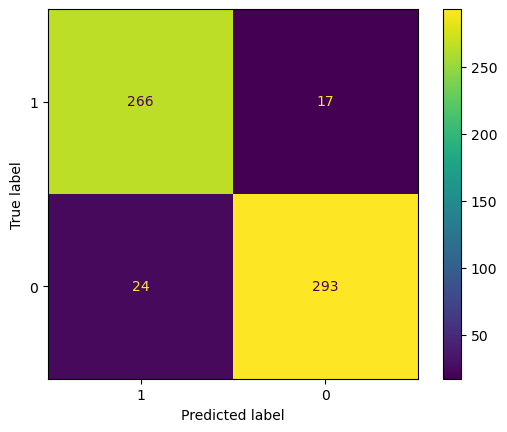

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df['Cancer Present'].unique()).plot()
plt.show()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       283
           1       0.95      0.92      0.93       317

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



## Prediction 

In [15]:
df_test=pd.DataFrame({'Gene One':[4.9],'Gene Two':[3.9]})
df_test

,Gene One,Gene Two
0,4.9,3.9


In [16]:
df_test=sc.fit_transform(df_test)
model.predict_proba(df_test)

array([[0.63157895, 0.36842105]])

In [17]:
model.predict(df_test)

array([0], dtype=int64)

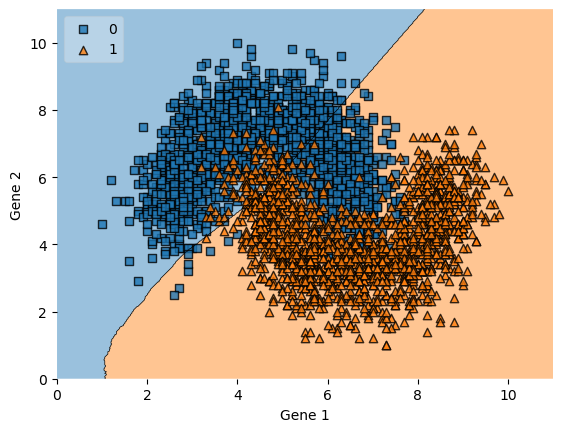

In [21]:
from mlxtend.plotting import plot_decision_regions

# plot_decision_regions() only supports visualizing decision boundaries for 2D feature spaces (i.e., two features)

plot_decision_regions(X.to_numpy(),y.to_numpy(),clf=model,legend=2)
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
plt.show()

# **Project Summary: GeneCheck: Cancer Predictor**

## **Objective**
This project aims to predict the presence of cancer based on two genetic markers using the K-Nearest Neighbors (KNN) classification algorithm.

## **Dataset Overview**
- **Total Samples:** 3,000  
- **Features:** Gene One, Gene Two  
- **Target Variable:** Cancer Present (1 = Yes, 0 = No)  
- **Data Type:** Numerical  

## **Model Performance**
### **Training & Testing Accuracy**
- **Train Accuracy:** 94.08%  
- **Test Accuracy:** 93.17%  
- **Cross-Validation Score:** 94.00%  

### **Confusion Matrix**


- **True Positives:** 293  
- **True Negatives:** 266  
- **False Positives:** 17  
- **False Negatives:** 24  

### **Classification Report**
| Metric       | Class 0 (No Cancer) | Class 1 (Cancer) | Overall |
|-------------|--------------------|----------------|---------|
| **Precision** | 92%                | 95%            | 93%     |
| **Recall**    | 94%                | 92%            | 93%     |
| **F1-score**  | 93%                | 93%            | 93%     |
| **Accuracy**  | -                  | -              | 93%     |

## **Conclusion**
The KNN model effectively predicts cancer presence based on genetic markers, achieving high accuracy (93%) with balanced precision and recall scores. The low false positive and false negative rates indicate a reliable predictive performance, making it a promising approach for gene-based cancer diagnosis.
